In [11]:
# Import libraries
import sys
import os
from joblib import load

import pandas as pd
from sklearn.metrics import r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

In [18]:
model_versions = ['M1', 'M4']
test_size_list = [0.5, 0.3, 0.1]

# Daily models

../ESP/models/ESP_Qd_t+1_FS3d


,feature,importance
0,Qd,0.361073
1,Time_elapsed,0.143556
2,Qd_t-1,0.127517
3,Day_of_year,0.114537
4,Qd_t-2,0.069490
5,Qd_t-5,0.051792
6,Qd_t-7,0.041393
7,Qd_t-6,0.036895
8,Qd_t-4,0.030524
9,Qd_t-3,0.023222


../EST/models/EST_Qd_t+1_FS3d


,feature,importance
0,Qd,0.931291
1,Qd_t-1,0.014956
2,Qd_t-6,0.010330
3,Day_of_year,0.007637
4,Qd_t-2,0.007042
5,Qd_t-5,0.006441
6,Qd_t-7,0.006392
7,Qd_t-3,0.005863
8,Time_elapsed,0.005707
9,Qd_t-4,0.004341


../ETH/models/ETH_Qd_t+1_FS3d


,feature,importance
0,Qd,0.798290
1,Qd_t-1,0.072231
2,Qd_t-2,0.032293
3,Qd_t-3,0.018568
4,Day_of_year,0.018258
5,Time_elapsed,0.015127
6,Qd_t-5,0.013299
7,Qd_t-6,0.011112
8,Qd_t-7,0.010473
9,Qd_t-4,0.010347


../USA/models/USA_Qd_t+1_FS3d


,feature,importance
0,Qd,0.837520
1,Qd_t-1,0.051560
2,Day_of_year,0.018649
3,Qd_t-3,0.017776
4,Qd_t-2,0.015030
5,Qd_t-4,0.014494
6,Time_elapsed,0.013472
7,Qd_t-5,0.011569
8,Qd_t-6,0.010107
9,Qd_t-7,0.009823


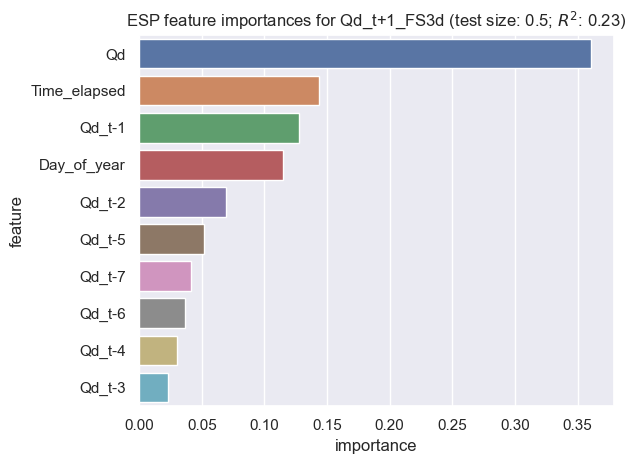

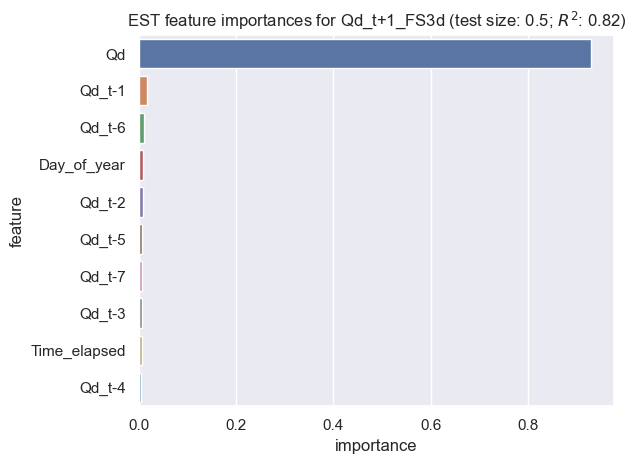

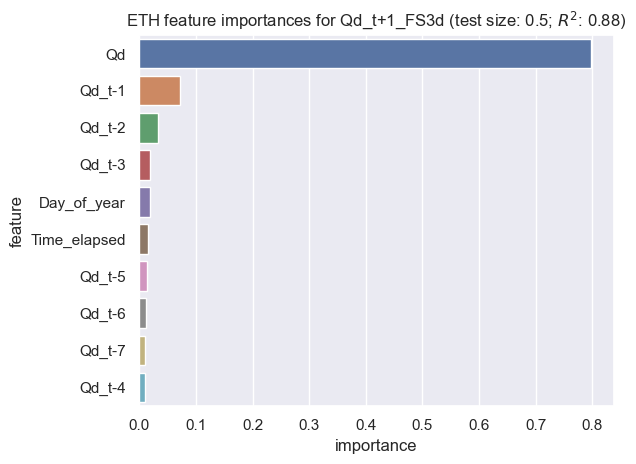

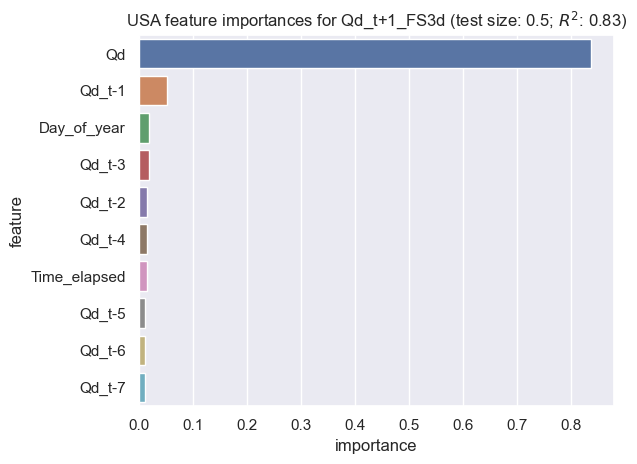

In [21]:
country_codes = ['ESP', 'EST', 'ETH', 'USA']
target = 'Qd_t+1'
feature_sets = ['FS1d', 'FS2d', 'FS3d', 'FS4d']
feature_sets = ['FS3d']
model_versions = [f'{target}_{feature_set}' for feature_set in feature_sets]
test_size_list = [0.5]
test_size = 0.5
for country_code in country_codes:
    for model_version in model_versions:
        model_dir = f'../{country_code}/models/{country_code}_{model_version}'
        print(model_dir)
        results = pd.read_csv(f'{model_dir}/{country_code}_{model_version}_results.csv')
        r2_test = round(float(results[results['model_version'] == model_version]['r2_test'].iloc[0]), 3)
        regressor = load(f'{model_dir}/{country_code}_{model_version}_{int(test_size*100)}.joblib')
        # Create DataFrame of feature importances and export to CSV
        feature_importances = regressor.feature_importances_
        feature_names = regressor.feature_names_in_
        imp_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importances})\
            .sort_values('importance', ascending=False)\
            .reset_index(drop=True)
        display(imp_df.head(15))
        fig, ax = plt.subplots(1, 1)
        sns.barplot(imp_df.head(15), x='importance', y='feature', ax=ax)
        # display(imp_df)
        # imp_df.to_csv(f'{model_dir}/{model}_feature_importances.csv', sep=',', index=False)
        
        # feature_importance = model.feature_importances_
        # sorted_idx = np.argsort(feature_importances)
        # fig = plt.figure(figsize=(12, 6))
        # plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
        # plt.yticks(range(len(sorted_idx)), np.array(feature_names)[sorted_idx])
        plt.title(f'{country_code} feature importances for {model_version} (test size: {test_size}; $R^{2}$: {r2_test})')
        plt.tight_layout()
        plt.savefig(f'D:/flow_swat_ml_paper/ml/figures/{country_code}_{model_version}_feat_imp_{int(test_size*100)}.png', dpi=300, bbox_inches='tight')

# Monthly models

../ESP/models/ESP_Qm_t+1_FS1m
../ESP/models/ESP_Qm_t+1_FS2m
../ESP/models/ESP_Qm_t+1_FS3m
../EST/models/EST_Qm_t+1_FS1m
../EST/models/EST_Qm_t+1_FS2m
../EST/models/EST_Qm_t+1_FS3m
../ETH/models/ETH_Qm_t+1_FS1m
../ETH/models/ETH_Qm_t+1_FS2m
../ETH/models/ETH_Qm_t+1_FS3m
../USA/models/USA_Qm_t+1_FS1m
../USA/models/USA_Qm_t+1_FS2m
../USA/models/USA_Qm_t+1_FS3m


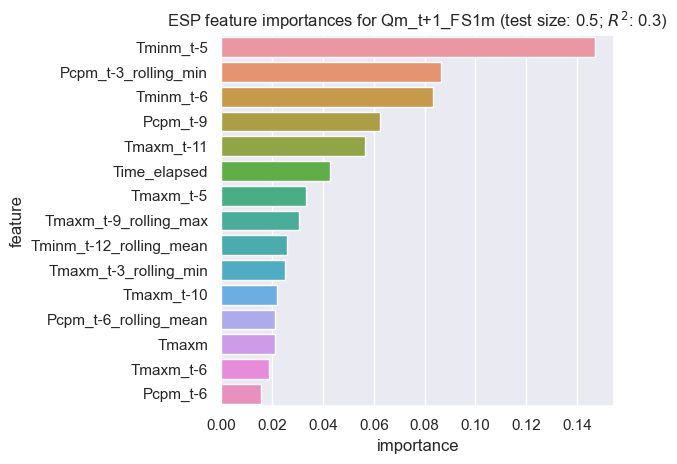

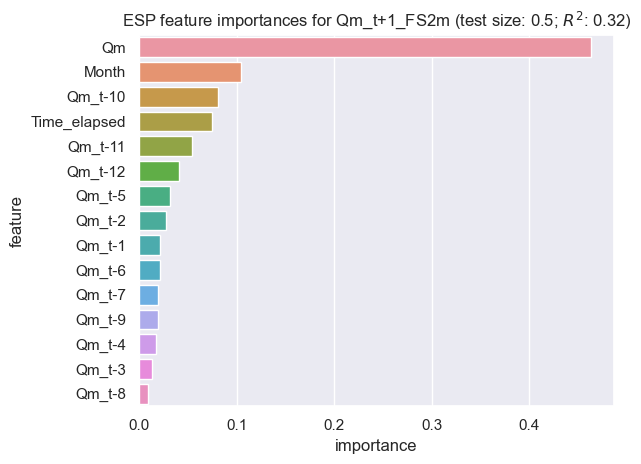

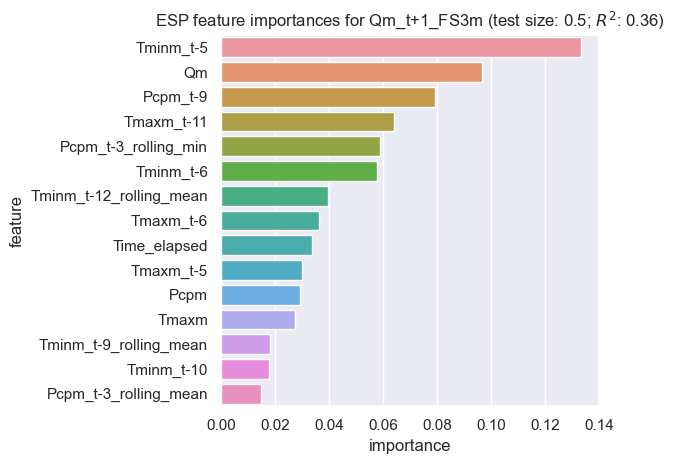

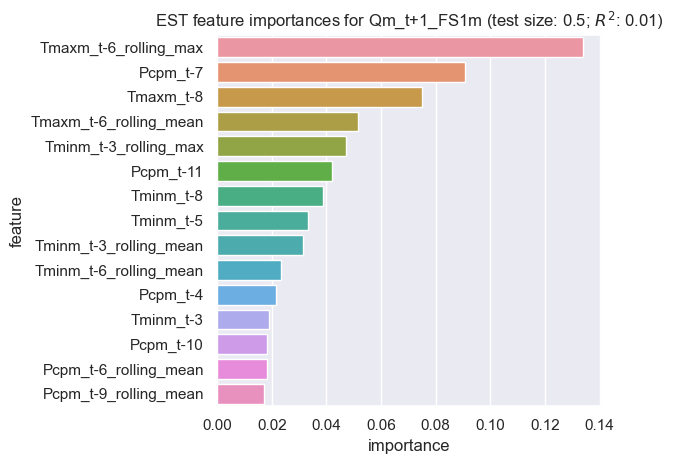

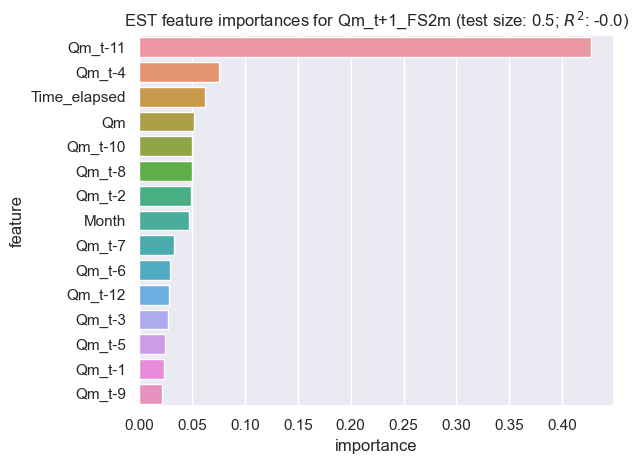

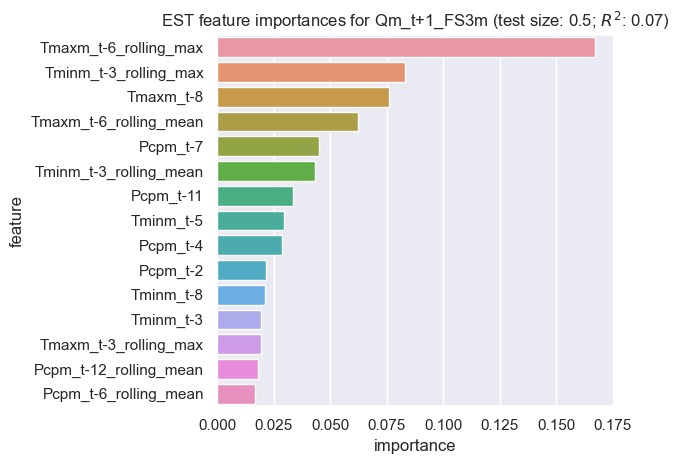

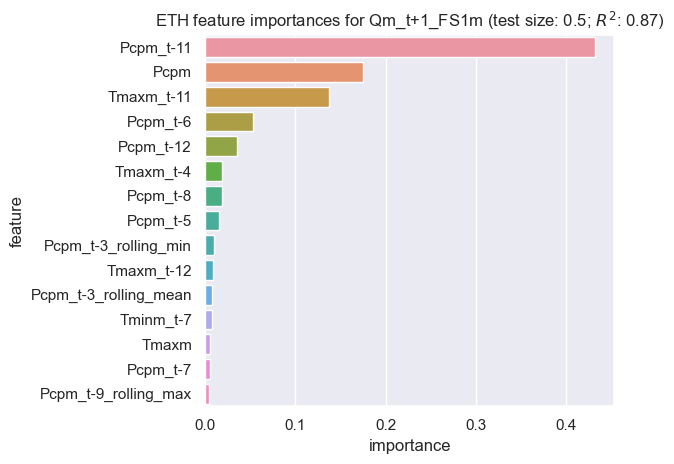

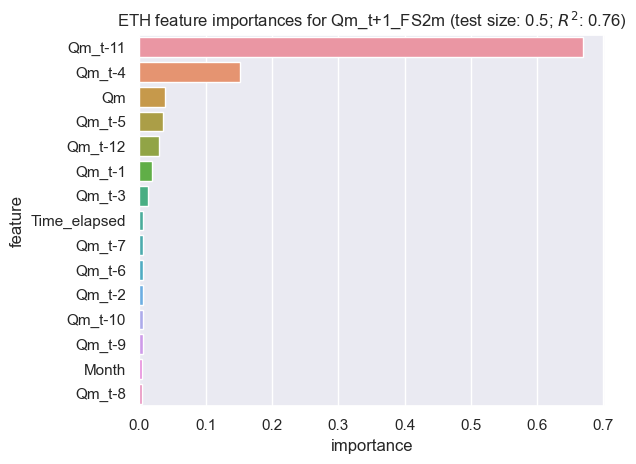

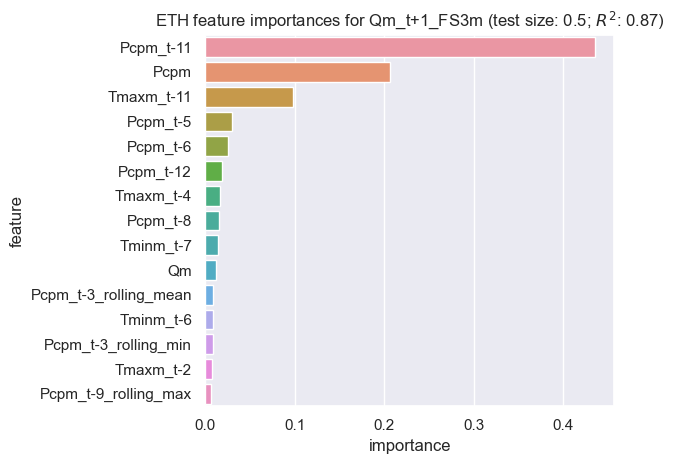

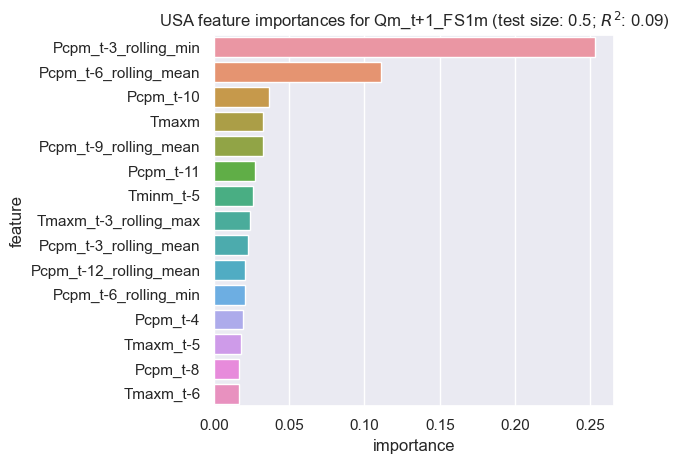

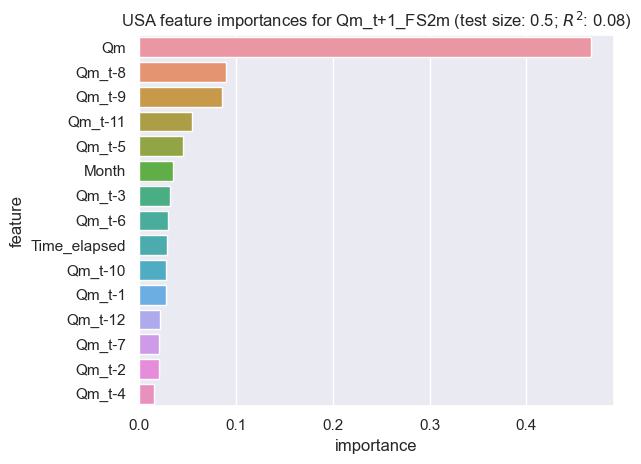

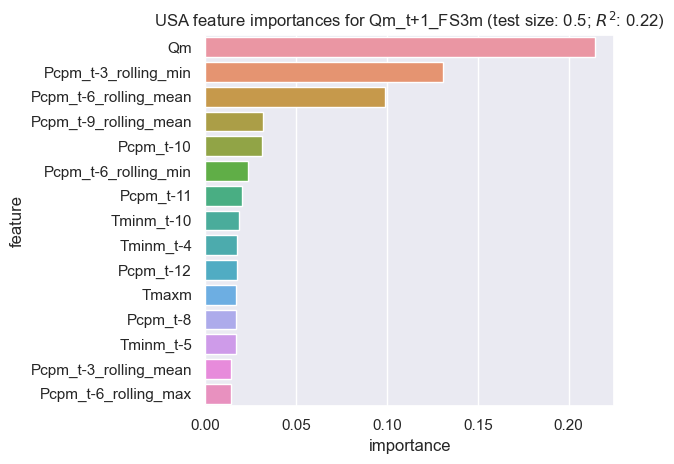

In [17]:
country_codes = ['ESP', 'EST', 'ETH', 'USA']
target = 'Qm_t+1'
feature_sets = ['FS1m', 'FS2m', 'FS3m']
model_versions = [f'{target}_{feature_set}' for feature_set in feature_sets]
test_size_list = [0.5]
test_size = 0.5
for country_code in country_codes:
    for model_version in model_versions:
        model_dir = f'../{country_code}/models/{country_code}_{model_version}'
        print(model_dir)
        results = pd.read_csv(f'{model_dir}/{country_code}_{model_version}_results.csv')
        r2_test = round(float(results[results['model_version'] == model_version]['r2_test'].iloc[0]), 3)
        regressor = load(f'{model_dir}/{country_code}_{model_version}_{int(test_size*100)}.joblib')
        # Create DataFrame of feature importances and export to CSV
        feature_importances = regressor.feature_importances_
        feature_names = regressor.feature_names_in_
        imp_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importances})\
            .sort_values('importance', ascending=False)\
            .reset_index(drop=True)
        fig, ax = plt.subplots(1, 1)
        sns.barplot(imp_df.head(15), x='importance', y='feature', ax=ax)
        # display(imp_df)
        # imp_df.to_csv(f'{model_dir}/{model}_feature_importances.csv', sep=',', index=False)
        
        # feature_importance = model.feature_importances_
        # sorted_idx = np.argsort(feature_importances)
        # fig = plt.figure(figsize=(12, 6))
        # plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
        # plt.yticks(range(len(sorted_idx)), np.array(feature_names)[sorted_idx])
        plt.title(f'{country_code} feature importances for {model_version} (test size: {test_size}; $R^{2}$: {r2_test})')
        plt.tight_layout()
        plt.savefig(f'D:/flow_swat_ml_paper/ml/figures/{country_code}_{model_version}_feat_imp_{int(test_size*100)}.png', dpi=300, bbox_inches='tight')

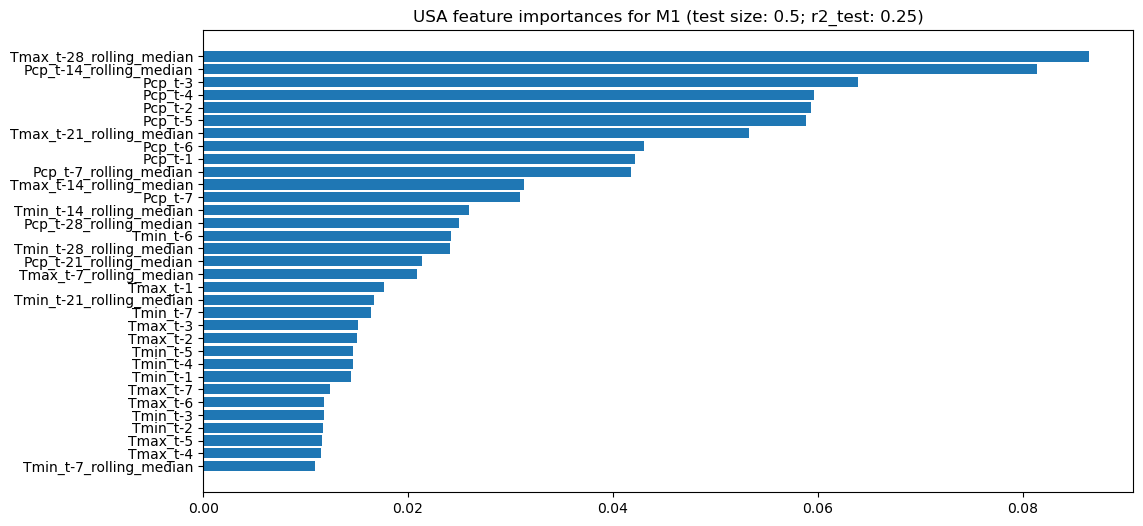

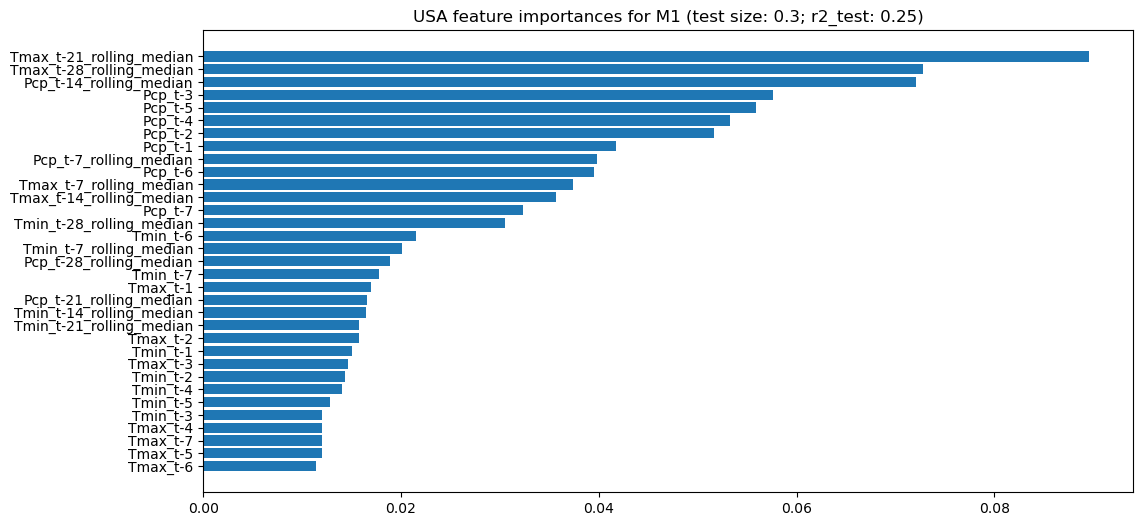

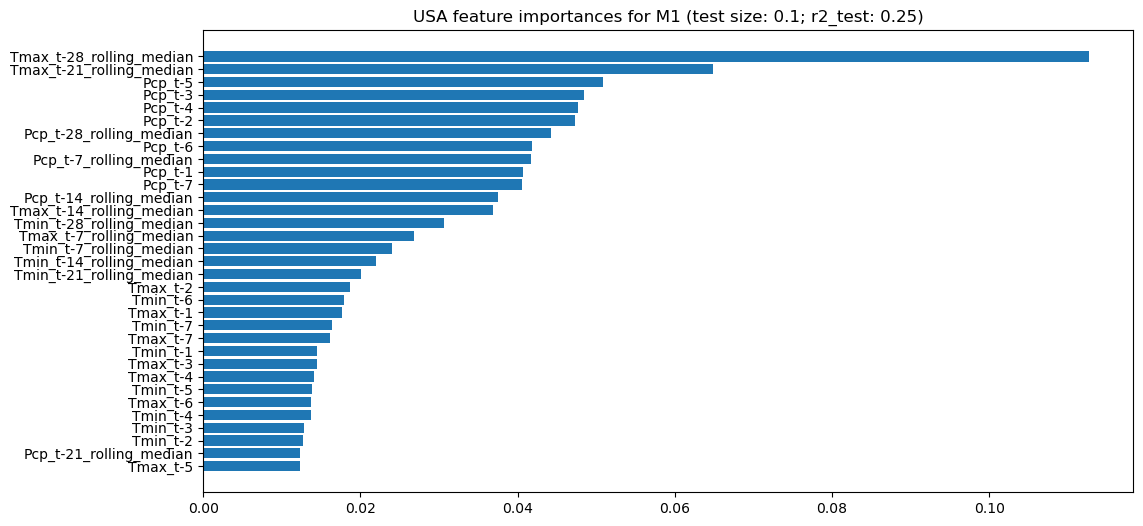

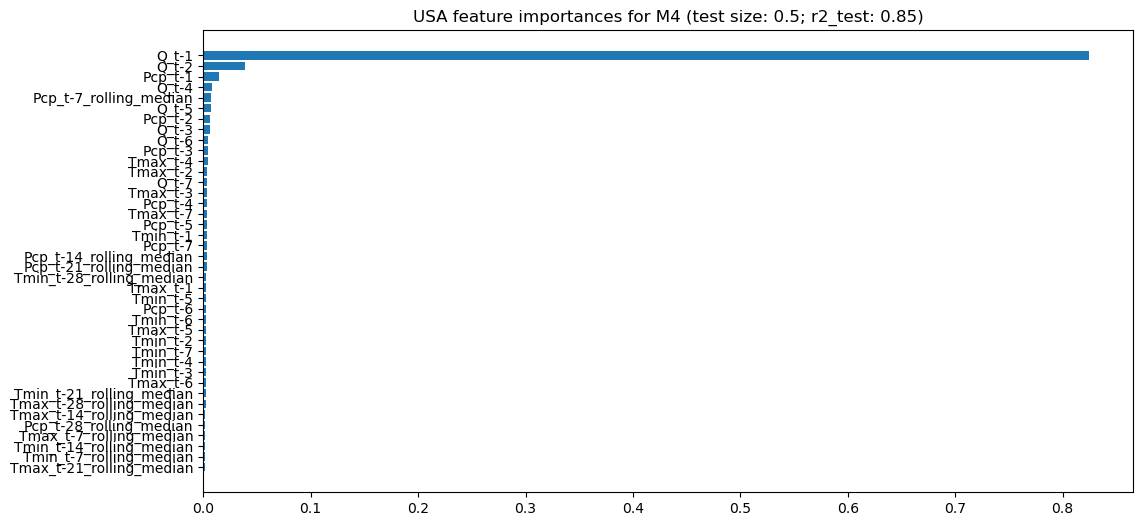

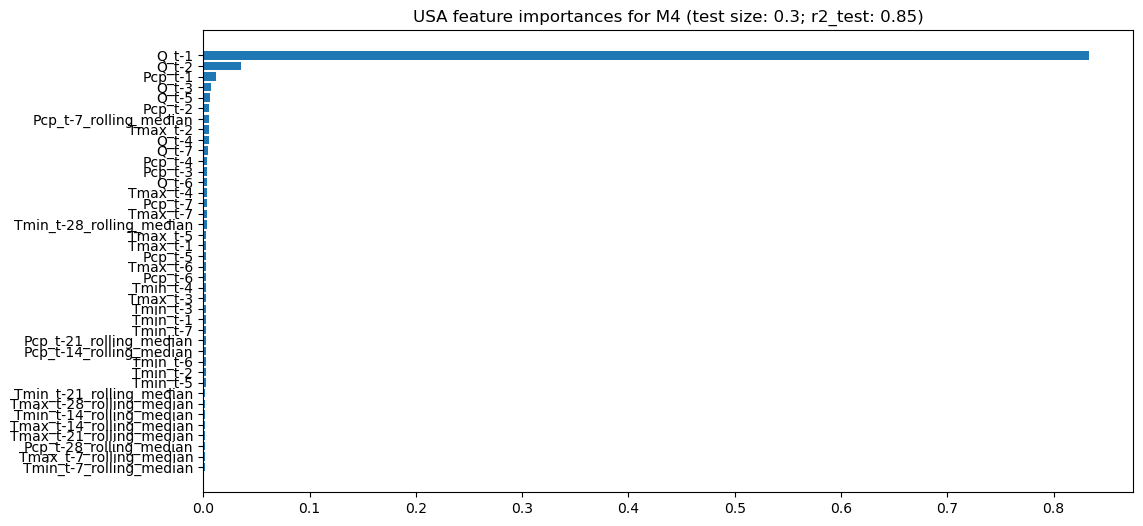

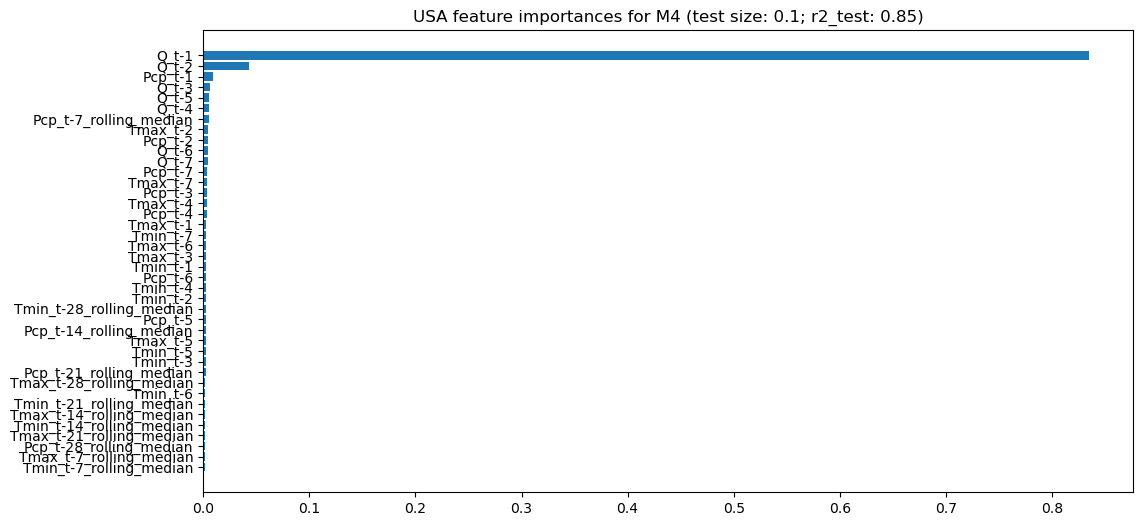

In [26]:
for model_version in model_versions:
    model_dir = f'D:/streamflow_ml/model/{country_code}/{model_version}'
    ml_input = pd.read_csv(f'{model_dir}/{country_code}_{model_version}_input.csv')
    results = pd.read_csv(f'{model_dir}/{country_code}_{model_version}_results.csv')
    r2_test = round(float(results[results['model_version'] == model_version]['r2_test'].iloc[0]), 3)
    results_list = []
    
    for test_size in test_size_list:

        # Load model
        regressor = load(f'{model_dir}/{country_code}_{model_version}_{int(test_size*100)}.joblib')
        # Create DataFrame of feature importances and export to CSV
        feature_importances = regressor.feature_importances_
        feature_names = regressor.feature_names_in_
        imp_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importances})\
            .sort_values('importance', ascending=False)\
            .reset_index(drop=True)
        # display(imp_df)
        # imp_df.to_csv(f'{model_dir}/{model}_feature_importances.csv', sep=',', index=False)
        
        # feature_importance = model.feature_importances_
        sorted_idx = np.argsort(feature_importances)
        fig = plt.figure(figsize=(12, 6))
        plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
        plt.yticks(range(len(sorted_idx)), np.array(feature_names)[sorted_idx])
        plt.title(f'{country_code} feature importances for {model_version} (test size: {test_size}; r2_test: {r2_test})')
        plt.savefig(f'D:/streamflow_ml/figures/{country_code}_{model_version}_feat_imp_{int(test_size*100)}.png', dpi=300, bbox_inches='tight')

In [ ]:
# Create DataFrame of feature importances and export to CSV
feature_importances = regressor.feature_importances_
feature_names = regressor.feature_names_in_
imp_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importances})\
    .sort_values('importance', ascending=False)\
    .reset_index(drop=True)
imp_df.to_csv(f'{model_dir}/{model}_feature_importances.csv', sep=',', index=False)